### Abalone dataset
Rahma Alfina Salsabila

The Abalone Dataset was originally published at the UCI Machine Learning Repository, and can be found at https://archive.ics.uci.edu/ml/datasets/Abalone. The original stated problem is estimate the age an abalone, which can be determined from the number of rings in their shell.

In [1]:
#import module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Preprocessing data

In [3]:
#load the data
df_abalone =pd.read_csv('datasets/abalone.data', header=None, names=['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings'])


In [30]:
df_abalone

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
#Checking the NAN value of the data 
Nan_rows= df_abalone[df_abalone.isnull().any(axis=1)]
Nan_rows.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings


In [5]:
#converting categorical variable to number
df_abalone['sex'], _ = pd.factorize(df_abalone['sex'])

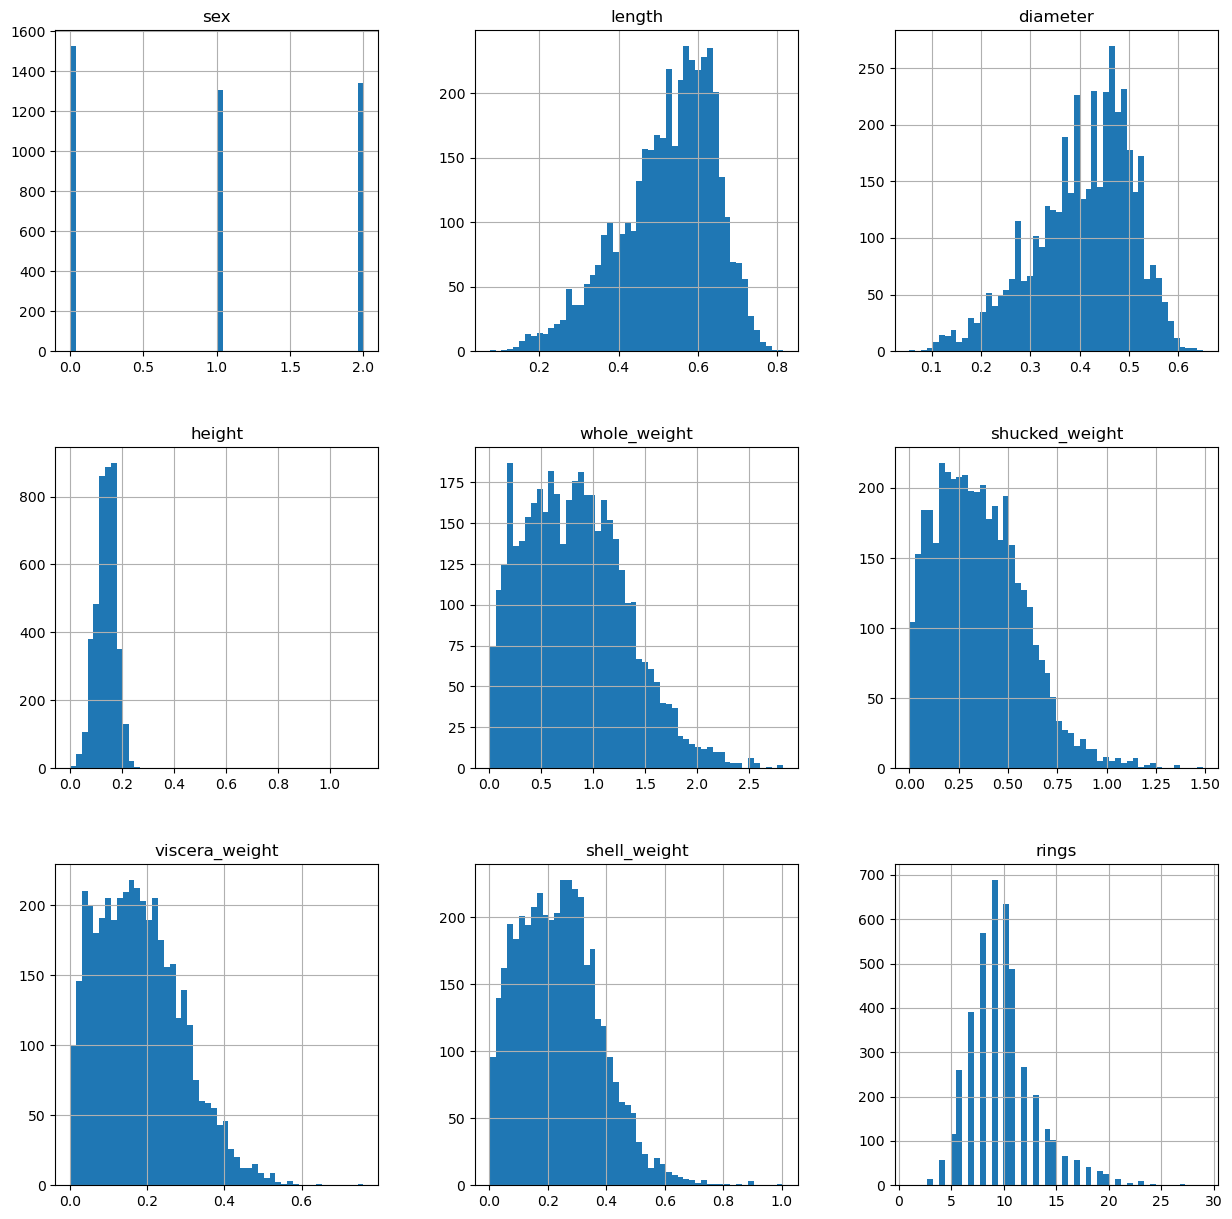

In [6]:
df_abalone.hist(bins=50,figsize=(15,15))
plt.show()

There are 9 columns of abalone data we got, with rings as the target variable. We then check the NaN value in the data, because NaN values can cause errors, and affect the performance of the models, and we found that there are no NaN in the data. From the histograms, we can see that the most of the variable are right-skewed data, which concentrated on the left side of the distribution. We also convert the categorical variable: sex, so it can be included in the model.

In [7]:
#Split the data into x and y
y_abalone= df_abalone.iloc[:,8]
x_abalone = df_abalone.iloc[:,0:8]

In [9]:
#Importing the module
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [10]:
#scalling the value for all features
scaler3 = MinMaxScaler()
x_abalone_scaled = scaler3.fit_transform(x_abalone)

#splitting the data into train and test data
X_train3, X_test3, y_train3, y_test3 = train_test_split(x_abalone_scaled, y_abalone, test_size=0.15, random_state=42)

In [29]:
x_abalone_scaled

array([[0.51351351, 0.5210084 , 0.0840708 , ..., 0.15030262, 0.1323239 ,
        0.14798206],
       [0.37162162, 0.35294118, 0.07964602, ..., 0.06624075, 0.06319947,
        0.06826109],
       [0.61486486, 0.61344538, 0.11946903, ..., 0.17182246, 0.18564845,
        0.2077728 ],
       ...,
       [0.70945946, 0.70588235, 0.18141593, ..., 0.3527236 , 0.37788018,
        0.30543099],
       [0.74324324, 0.72268908, 0.13274336, ..., 0.35642233, 0.34298881,
        0.29347285],
       [0.85810811, 0.84033613, 0.17256637, ..., 0.63517149, 0.49506254,
        0.49177877]])

We will train a Decision Tree Regression using a 3-fold cross-validation to tune max depth, letting all other hyperparameters in their default values.

#### Build ML Model

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [14]:
#Define variables for max_depths, train_errors, cv_errors and test_errors

max_depths = list(range(1, 21))
train_errors = []
cv_errors = []
test_errors = []

for max_depth in max_depths:
    # Train decision tree with current max_depth
    dt = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    dt.fit(X_train3, y_train3)
    
    # Calculate training error
    train_error = mean_squared_error(y_train3, dt.predict(X_train3), squared=False)
    train_errors.append(train_error)
    
    # Calculate cross-validation error
    cv_error = -cross_val_score(dt, X_train3, y_train3, cv=3, scoring="neg_root_mean_squared_error").mean()
    cv_errors.append(cv_error)
    
    # Calculate test error
    test_error = mean_squared_error(y_test3, dt.predict(X_test3), squared=False)
    test_errors.append(test_error)

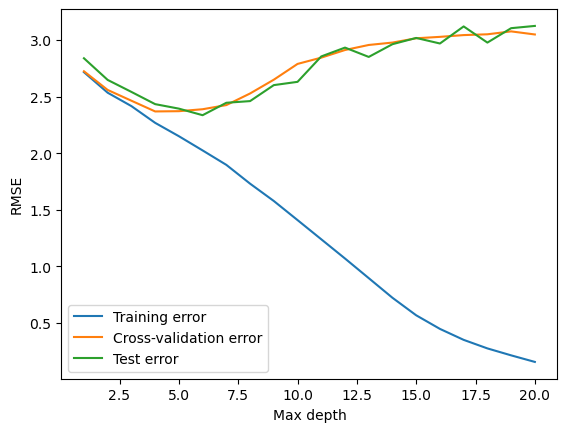

In [15]:
plt.plot(max_depths, train_errors, label="Training error")
plt.plot(max_depths, cv_errors, label="Cross-validation error")
plt.plot(max_depths, test_errors, label="Test error")
plt.xlabel("Max depth")
plt.ylabel("RMSE")
plt.legend()
plt.show()

Based on the plot of the training, cross-validation, and test errors vs max depth, the best value for max depth is around 5. It is because the cross-validation error is minimized around this value, and the test error is also relatively low. We also can see that when max depth grows over this limit, the model begins to overfit to the training data, as seen by the widening gap between the training error and cross-validation error. 

We will train another Decision Tree Regression using a 3-fold cross-validation to tune min samples leaf, usingmax depth as selected in the previous task and letting all other hyperparameters in their default values.

In [16]:
#Define variables for max_depths, train_errors, cv_errors and test_errors

max_depth = 5
min_samples_leafs = range(1, 51)
train_errors = []
cv_errors = []
test_errors = []

for min_sample_leaf in min_samples_leafs:
    # Train decision tree with min_sample_leaf
    dt = DecisionTreeRegressor(max_depth=max_depth, min_samples_leaf=min_sample_leaf, random_state=42)
    dt.fit(X_train3, y_train3)
    
    # Calculate training error
    train_error = mean_squared_error(y_train3, dt.predict(X_train3), squared=False)
    train_errors.append(train_error)
    
    # Calculate cross-validation error
    cv_error = -cross_val_score(dt, X_train3, y_train3, cv=3, scoring="neg_root_mean_squared_error").mean()
    cv_errors.append(cv_error)
    
    # Calculate test error
    test_error = mean_squared_error(y_test3, dt.predict(X_test3), squared=False)
    test_errors.append(test_error)

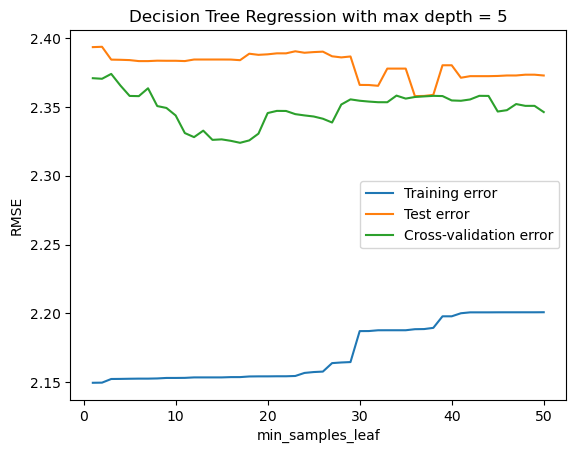

In [28]:
# Plot the training and cross-validation errors as a function of min samples leaf
plt.plot(min_samples_leafs, train_errors, label='Training error')
plt.plot(min_samples_leafs, test_errors, label='Test error')
plt.plot(min_samples_leafs, cv_errors, label='Cross-validation error')
plt.xlabel('min_samples_leaf')
plt.ylabel('RMSE')
plt.title('Decision Tree Regression with max depth = ' + str(max_depth))
plt.legend()
plt.show()


The plot shows the training, cross-validation, and test errors as a function of the min_samples_leaf hyperparameter. Training error increases from the beginning until the min_sample_leaf is 50 (even though it is not bigger than the test and cv error), which means the lower the min_sample_leaf, the better the model catches the pattern of the training data, which leads to overfitting. However, test error decreases gradually and simultaneously along the increasing number of min_sample_leaf. The best min_sample leaf for the model is around 37 when the gap between those three graphs is closest while having a moderately low error compared to other min_sample_leaf number.

Then, we try to implement a Random Forest regressor with 500 estimators. As the ring values must be integers, the predicted results from the Random Forest regressor must be firstly rounded to the nearest integer before the RMSE computation.

In [18]:
from sklearn.ensemble import RandomForestRegressor

# Define the Random Forest Regressor with 500 estimators and the best hyperparameters
rf_reg1 = RandomForestRegressor(n_estimators=500, 
                                max_depth=20, 
                                min_samples_leaf=1, 
                                max_features='sqrt',
                                max_samples=0.9,
                                min_samples_split=2,
                                bootstrap=True,
                                random_state=42)

# Train the Random Forest Regressor on the training set
rf_reg1.fit(X_train3, y_train3)

# Make predictions on the test set and round to nearest integer
y_pred_rf1 = rf_reg1.predict(X_test3)
y_pred_rf1 = np.round(y_pred_rf1)

# Compute the RMSE for the predictions on the test set
rf_rmse1 = np.sqrt(mean_squared_error(y_test3, y_pred_rf1))
print("Random Forest Regressor RMSE: {:.4f}".format(rf_rmse1))


Random Forest Regressor RMSE: 2.1761


The Random Forest Regressor was trained using 500 estimators, utilising the chosen values of maximum depth and minimum sample size for the leaf, and manually testing with additional hyperparameters like maximum samples, maximum features, and bootstrap. The model's predictions on the test set had RMSE of 2.1761, which means that model predicted wrong by an average of 2.18 rings. The RMSE value depends on the target variable's scale. A RMSE of 2.1761 could be acceptable because the number of rings is a tiny integer variable, not continuous variable.

We will use the feature importances obtained from the training process to trim the feature dimension of the data. we will retain only those features whose importance values are above 5%.

In [19]:
#convert the X_train into dataframe and give the column names
X_train3_df = pd.DataFrame(X_train3, columns=['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight'])

In [20]:
from sklearn.feature_selection import SelectFromModel

# Create a feature selection object
sfm = SelectFromModel(rf_reg1, threshold=0.05)

# Fit the feature selection object to the training data and transform the data
X_train_selected = sfm.fit_transform(X_train3_df, y_train3)

# Get the support of the selected features
support = sfm.get_support()

# Print the retained features
retained_features = X_train3_df.columns[support]
print("Retained features:", retained_features.tolist())

# Print the removed features
removed_features = X_train3_df.columns[~support]
print("Removed features:", removed_features.tolist())

# Compute the total feature importance value that is retained
total_importance = sum(rf_reg1.feature_importances_[support])
print("Total feature importance value that is retained:", total_importance)

Retained features: ['length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight']
Removed features: ['sex']
Total feature importance value that is retained: 0.9704005050285145


The output of the code reveals that "length," "diameter," "height," "whole_weight," "shucked_weight," "viscera_weight," and "shell_weight" are the variables retained after dimensionality reduction. The deletion of the variable "sex" suggests that it has little to no predictive value in the model. After dimensionality reduction, the overall feature importance value that is kept is 0.9704. This indicates that around 97% of the variance in the target variable can be explained by the traits that were kept. Overall, this indicates that the chosen characteristics may be used to create a model that is more effective and efficient since they are the most significant in predicting the target variable. Since 'sex' did not considerably increase the model's predictive ability, it was deleted.

Next, we will repeat the training and prediction processes above on the reduced-dimensional data. We expect to see a slight decrease of RMSE for the reduced-dimensional data. In many real applications, the feature dimension of the data may be reduced drastically with only a slight increase in the prediction error. We won’t see this in this small dataset as the feature dimension is already quite small.

In [21]:
#drop the feature that is not really important: sex
x_abalone.drop('sex', axis=1, inplace=True)

In [22]:
#scalling the value for all features
scaler3 = MinMaxScaler()
x_abalone_scaled = scaler3.fit_transform(x_abalone)

#splitting the data into train and test data again
X_train3_2, X_test3_2, y_train3_2, y_test3_2 = train_test_split(x_abalone_scaled, y_abalone, test_size=0.15, random_state=42)

In [23]:
from sklearn.ensemble import RandomForestRegressor

# Define the Random Forest Regressor with 500 estimators and the best hyperparameters
rf_reg2 = RandomForestRegressor(n_estimators=500, 
                                max_depth=20, 
                                min_samples_leaf=1, 
                                max_features='sqrt',
                                max_samples=0.9,
                                min_samples_split=2,
                                bootstrap=True,
                                random_state=42)

# Train the Random Forest Regressor on the training set
rf_reg2.fit(X_train3_2, y_train3_2)

# Make predictions on the test set and round to nearest integer
y_pred_rf2 = rf_reg2.predict(X_test3_2)
y_pred_rf2 = np.round(y_pred_rf2)

# Compute the RMSE for the predictions on the test set
rf_rmse = np.sqrt(mean_squared_error(y_test3_2, y_pred_rf2))
print("Random Forest Regressor RMSE: {:.4f}".format(rf_rmse))


Random Forest Regressor RMSE: 2.1969


RMSE output for both model before removing sex feature and after removing is really close , which means that the removal of one feature is not really affecting the model and the sex feature does not have significant relationship to the target value. That is why we got the close RMSE value even though we were dropping one variable.

Finally, we will compare the performance of the two Random Forest regressors. We will illustrate in a diagram of two the prediction errors of all the test instances from one of the above models

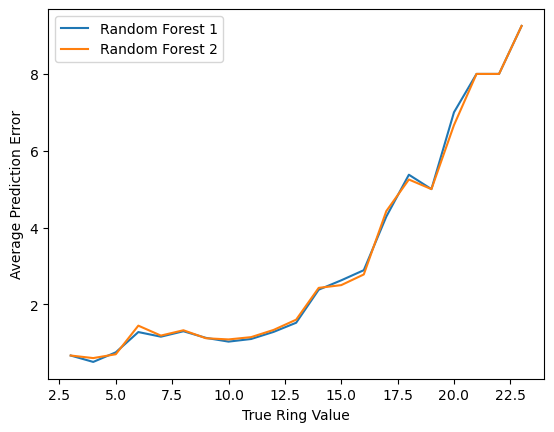

In [24]:
# Compute the absolute difference between the predicted and true values
y_pred1_round = np.round(y_pred_rf1).astype(int)
y_pred2_round = np.round(y_pred_rf2).astype(int)
abs_diff1 = np.abs(y_test3 - y_pred1_round)
abs_diff2 = np.abs(y_test3_2 - y_pred2_round)

# Group the test instances by their true ring value and compute the average prediction error for each group
abs_diff1_avg = [np.mean(abs_diff1[y_test3 == i]) for i in range(1, 30)]
abs_diff2_avg = [np.mean(abs_diff2[y_test3_2 == i]) for i in range(1, 30)]

# Plot the average prediction errors for each ring value
plt.plot(range(1, 30), abs_diff1_avg, label='Random Forest 1')
plt.plot(range(1, 30), abs_diff2_avg, label='Random Forest 2')
plt.xlabel('True Ring Value')
plt.ylabel('Average Prediction Error')
plt.legend()
plt.show()


The plot demonstrates that from two models, it has similar trend, which sometimes overlapping (due to the similar RMSE even after dropping one variable), the average prediction errors tend to rise with increasing ring values. This could be because greater ring values have less training instances, which means that the models may do not have enough data for larger ring values to provide reliable predictions. 

In this part, we will implement a Bagging regressor with 500 SVM regressors as the base estimators. We choose some reasonable hyperparameter values manually for the SVM regressors. For the Bagging regressor, we should use the same common hyperparameter values (e.g., max features, max samples, bootstrap, etc) as the Random Forest regressor.

In [25]:
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR

# Define SVM regressor with hyperparameters
svm = SVR(kernel='rbf', C=1, epsilon= 0.01)

# Define bagging regressor with 500 SVM regressors
bagging = BaggingRegressor(base_estimator=svm, 
                           n_estimators=500,
                            max_samples=0.9,
                            bootstrap=True,
                            random_state=42)

# Train bagging regressor on full-dimensional training set
bagging.fit(X_train3, y_train3)


# Test bagging regressor on full-dimensional test set
y_pred_bagging = np.round(bagging.predict(X_test3)).astype(int)

# Compute RMSE of predictions on test set
rmse = np.sqrt(mean_squared_error(y_test3, y_pred_bagging))
print("RMSE:", rmse)

RMSE: 2.2938097127715507


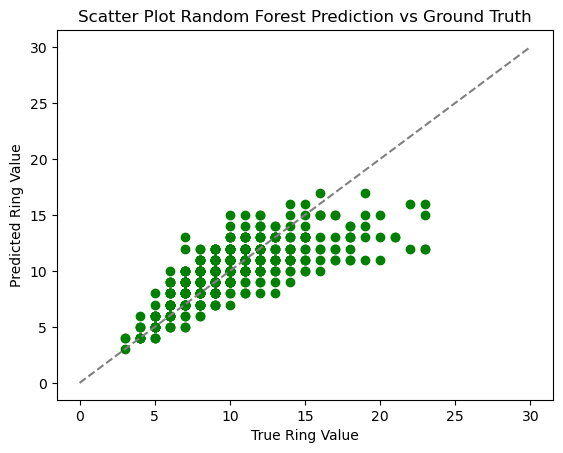

In [26]:
# Illustrate predicted ring values versus ground truth ring values
plt.scatter(y_test3, y_pred_rf1, color='green')
plt.plot([0, 30], [0, 30], '--', color='gray') # Plot diagonal line for reference
plt.xlabel("True Ring Value")
plt.ylabel("Predicted Ring Value")
plt.title('Scatter Plot Random Forest Prediction vs Ground Truth' )
plt.show()


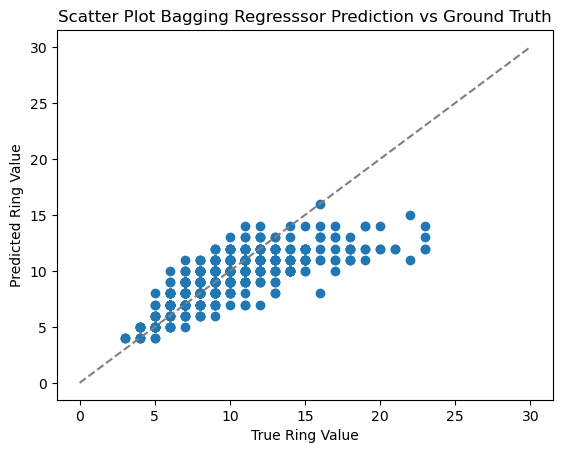

In [27]:
# Illustrate predicted ring values versus ground truth ring values
plt.scatter(y_test3, y_pred_bagging)
plt.plot([0, 30], [0, 30], '--', color='gray') # Plot diagonal line for reference
plt.xlabel("True Ring Value")
plt.ylabel("Predicted Ring Value")
plt.title('Scatter Plot Bagging Regresssor Prediction vs Ground Truth' )
plt.show()


The Random Forest regressor had an RMSE of 2.1761, while the Bagging regressor had an RMSE of 2.2938. This means that the Random Forest model performed slightly better on this dataset. In terms of the predicted ring values versus the ground truth ring values, both models had similar patterns of predictions. However, there were some instances where the Bagging model had larger errors compared to the Random Forest model, where we can see that the random forest prediction vs ground truth is plotting better around the diagonal line than the bagging regressor.  